**Asthma Diagnosis**

This dataset is pertinent to Asthma, and obtained from kaggle. (https://www.kaggle.com/datasets/rabieelkharoua/asthma-disease-dataset/data). Rabie El Kharoua. (2024). 🌬️ Asthma Disease Dataset 🌬️ [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/8669080

In this assignment, I will employ different approaches to solve the **classification task of asthma/vs no asthma diagnosis**. I personally work in healthcare and am interested in looking into this problem.

The project topic while straightforward, is an important issue that clinician face in the real world setting. Presently, most of the evidence is being outlined in  Global Initiative for Asthma (GINA) guidelines. However, **perhaps there may be a better approach in diagnosis that focuses on easily obtainable variables that can be obtained through patient reporting.**

**There are certain limitations that I will address subsequently**, to quote one of the literature that we use in the clinical setting:

Asthma may be distinguished from other lung conditions by the capacity for a "large" increase in Forced expiratory volume (FEV1) or Forced vital capacity (FVC). The definition of a large bronchodilator response is not standardized; but a large reversibility of airflow obstruction on spirometry (increase in FEV1 >15 percent) generally confirm the diagnosis of asthma (UptoDate, 2024).

I will circle back to this later, but the essence is that this dataset does not talk about this crucial test that aids the diagnosis of asthma.

Nevertheless, if we can get a pretty accurate diagnosis from just patient reportable factors, perhaps it may be considered a go-to in the future, or in countries with poorer resource.

We will have to spend some time to go through each of the columns

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/5509 ML course/asthma_disease_data.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2392 non-null   int64  
 1   Age                     2392 non-null   int64  
 2   Gender                  2392 non-null   int64  
 3   Ethnicity               2392 non-null   int64  
 4   EducationLevel          2392 non-null   int64  
 5   BMI                     2392 non-null   float64
 6   Smoking                 2392 non-null   int64  
 7   PhysicalActivity        2392 non-null   float64
 8   DietQuality             2392 non-null   float64
 9   SleepQuality            2392 non-null   float64
 10  PollutionExposure       2392 non-null   float64
 11  PollenExposure          2392 non-null   float64
 12  DustExposure            2392 non-null   float64
 13  PetAllergy              2392 non-null   int64  
 14  FamilyHistoryAsthma     2392 non-null   

In [ ]:
pd.set_option('display.max_columns', None)
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,PetAllergy,FamilyHistoryAsthma,HistoryOfAllergies,Eczema,HayFever,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,6229.500000,42.137960,0.493311,0.669732,1.307274,27.244877,0.141722,5.051786,5.022867,7.019012,5.013030,5.114221,4.981864,0.165970,0.301003,0.399247,0.191890,0.253344,0.158027,2.548564,3.741270,0.596154,0.500418,0.503344,0.503344,0.602425,0.604933,0.051839
std,690.655244,21.606655,0.500060,0.986120,0.898242,7.201628,0.348838,2.903574,2.909980,1.732475,2.935605,2.893088,2.859192,0.372131,0.458790,0.489846,0.393869,0.435017,0.364842,0.861809,1.303689,0.490770,0.500104,0.500093,0.500093,0.489499,0.488967,0.221749
min,5034.000000,5.000000,0.000000,0.000000,0.000000,15.031803,0.000000,0.001740,0.003031,4.001437,0.001022,0.000659,0.002434,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000459,1.500045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5631.750000,23.000000,0.000000,0.000000,1.000000,20.968313,0.000000,2.578333,2.432043,5.498500,2.432559,2.599996,2.467489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.824113,2.607489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6229.500000,42.000000,0.000000,0.000000,1.000000,27.052202,0.000000,5.016881,5.115383,6.975839,5.036519,5.098452,4.903278,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.553244,3.734982,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,6827.250000,61.000000,1.000000,1.000000,2.000000,33.555903,0.000000,7.540234,7.544216,8.526950,7.630037,7.708836,7.432218,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.292897,4.864121,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,7425.000000,79.000000,1.000000,3.000000,3.000000,39.985611,1.000000,9.995809,9.999904,9.996235,9.998964,9.999555,9.999708,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.999719,5.999421,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


What we need to focus on is:


1.   Does the column make sense to our prediction?
2.   Does the minmax look suspicious? - In the sense that is it out of range or is there outliers that we should be concerned about.



The following code takes the ratio of LungFunctionFEV1 and LungFunctionFVC. The shortened explanation is that lung function fev1 is the amount of air that person can force out of their lungs in 1 second, and this cannot be more than the lung function FVC, which is the maximal capacity amount of air forced out during the FEV test.

In [ ]:
df['Fev_FVC_ratio'] = df['LungFunctionFEV1']/df['LungFunctionFVC']
df = df[df['Fev_FVC_ratio'] <= 1]

In [ ]:
df.drop(inplace = True, columns = ['PatientID', 'DoctorInCharge', 'LungFunctionFEV1', 'LungFunctionFVC'])
columns = list(df.columns)
columns[-1], columns[-2] = columns[-2], columns[-1]
df = df[columns]

In [ ]:
df.tail(5)

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,PetAllergy,FamilyHistoryAsthma,HistoryOfAllergies,Eczema,HayFever,GastroesophagealReflux,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Fev_FVC_ratio,Diagnosis
2385,19,1,1,2,37.913891,0,5.595540,3.120986,4.122047,1.721562,6.987788,0.341095,0,1,1,0,0,0,0,1,1,1,0,1,0.783909,0
2387,43,1,0,2,29.059613,0,3.019854,6.119637,8.300960,2.483829,7.314582,3.425445,1,0,1,0,0,0,0,1,0,0,0,1,0.604961,1
2388,18,1,0,1,20.740850,0,5.805180,4.386992,7.731192,7.733983,2.279073,6.467701,0,0,0,1,0,0,0,0,0,1,1,0,0.205641,1
2389,54,0,3,2,37.079560,0,4.735169,8.214064,7.483521,2.794847,3.055139,9.484013,0,0,0,0,1,0,1,0,1,1,0,1,0.503742,1
2391,26,1,0,0,28.123021,1,1.613138,7.412878,8.512253,3.231709,3.874028,5.064317,0,1,0,0,0,0,1,1,0,0,1,0,0.929616,0


In [ ]:
df['Diagnosis'].mean()

0.05497526113249038

The diagnosis rate of 5% is something that we need to take note of. Certainly, in view of this dataset, and also that it is a medical problem, sensitivity is somethign we have to keep in mind.

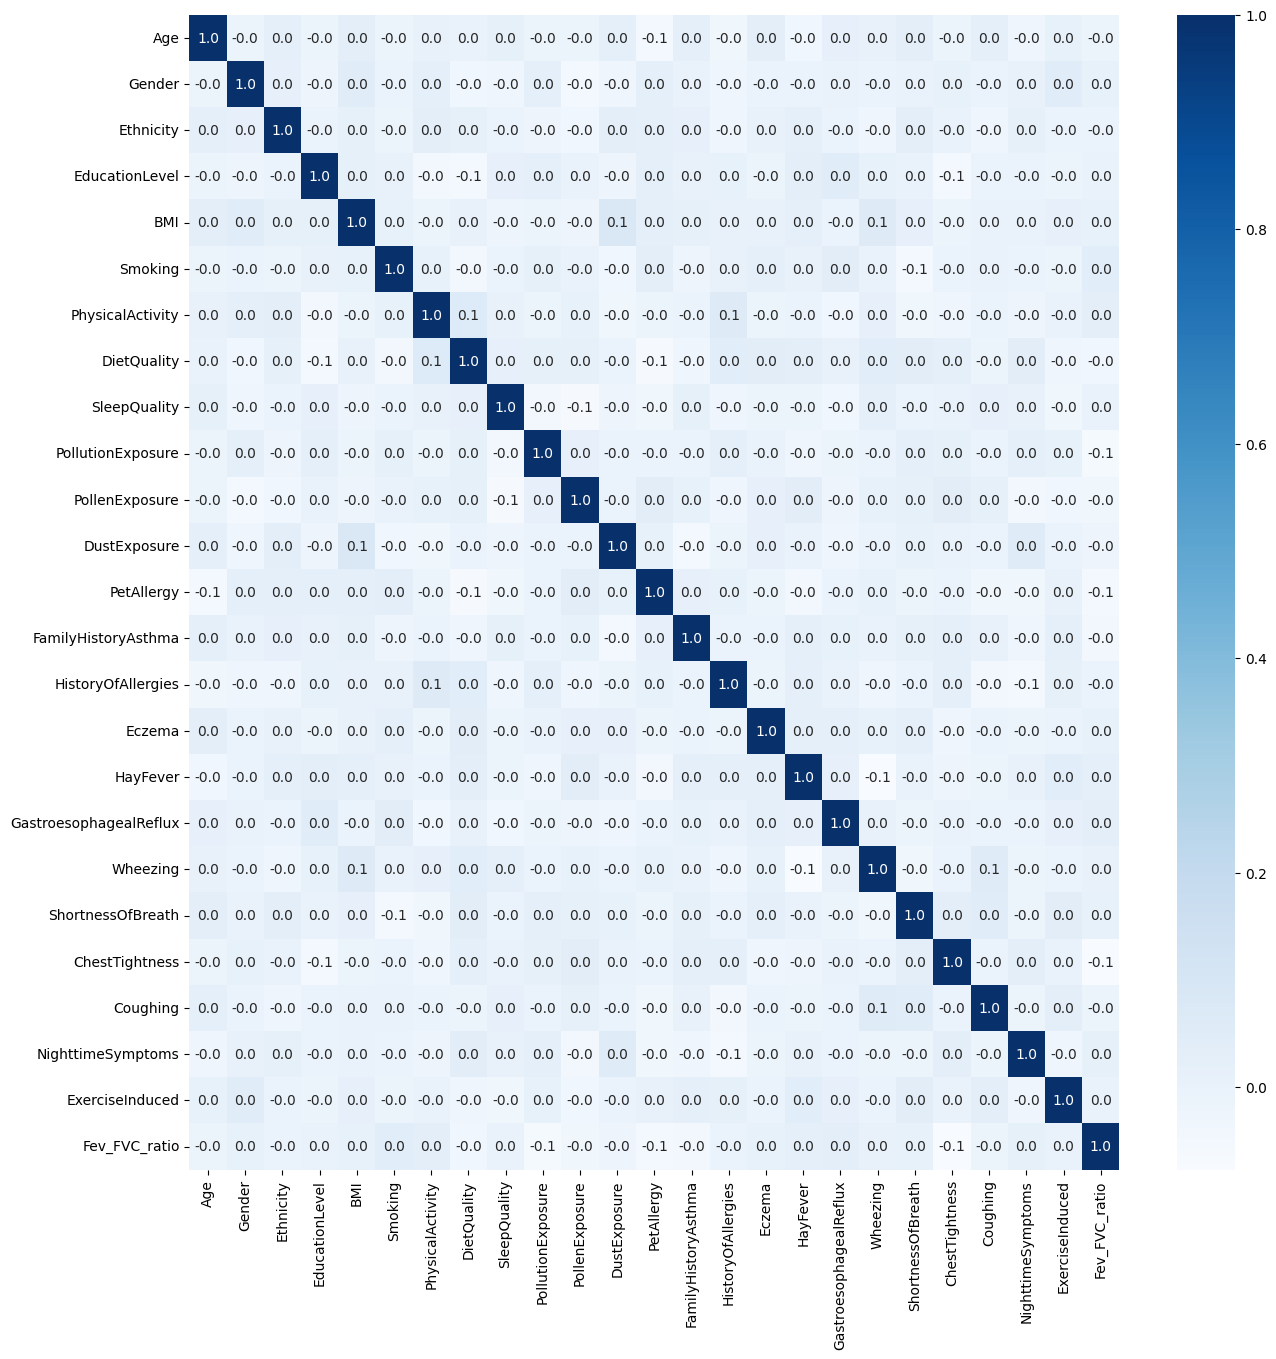

In [ ]:
corr_plt = df.iloc[:, :-1].corr()
plt.figure(figsize=(15, 15))
heatmap_attempt = sns.heatmap(corr_plt, annot=True, fmt = '.1f',  cmap='Blues')
plt.show()

From the corr_plot, we can see that there is barely any correlations between the features.

Let's import our necessary library and train it upon different methods. An overview of the steps will be:


1.   Split the dataset into train vs test
2.   Train the dataset
3.   Test and compare




In [ ]:
import scipy as sp
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, recall_score, accuracy_score, f1_score, classification_report

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
X = df.iloc[:, :-1]
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1108)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
np.mean(y_resampled)

0.5

In [ ]:
X.shape, X_test.shape, X_resampled.shape

((1819, 25), (364, 25), (2760, 25))

In [ ]:
clf_log = LogisticRegression(random_state= 1108, max_iter=1000, class_weight = "balanced").fit(X_resampled, y_resampled)
clf_log_test = clf_log.predict(X_test)
print(accuracy_score(y_test, clf_log_test))
print(recall_score(y_test, clf_log_test))
print(f1_score(y_test, clf_log_test))

np.mean(clf_log_test)

0.7939560439560439
0.24
0.1379310344827586


0.17032967032967034

As you can see over here, the results from the logistic regression, the accuracy is around 79%, but the recall is not great. We will look at a few other approaches at its default settings and subsequently pick the one of them to further explore upon.

In [ ]:
clf_neighbour = KNeighborsClassifier(n_neighbors=5).fit(X_resampled, y_resampled)
clf_neighbour_test = clf_neighbour.predict(X_test)
print(accuracy_score(y_test, clf_neighbour_test))
print(recall_score(y_test, clf_neighbour_test))
print(f1_score(y_test, clf_neighbour_test))

np.mean(clf_neighbour_test)
report = classification_report(y_test, clf_neighbour_test)
print('Classification Report:')
print(report)

0.6703296703296703
0.24
0.09090909090909091
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.70      0.80       339
           1       0.06      0.24      0.09        25

    accuracy                           0.67       364
   macro avg       0.49      0.47      0.44       364
weighted avg       0.87      0.67      0.75       364



In [ ]:
clf_RF = RandomForestClassifier(max_depth=2, random_state= 1108, class_weight = "balanced").fit(X_resampled, y_resampled)
clf_RF_test = clf_RF.predict(X_test)
print(accuracy_score(y_test, clf_RF_test))
print(recall_score(y_test, clf_RF_test))
print(f1_score(y_test, clf_RF_test))

np.mean(clf_RF_test)
report = classification_report(y_test, clf_RF_test)
print('Classification Report:')
print(report)

0.7554945054945055
0.32
0.15238095238095237
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.79      0.86       339
           1       0.10      0.32      0.15        25

    accuracy                           0.76       364
   macro avg       0.52      0.55      0.50       364
weighted avg       0.88      0.76      0.81       364



In [ ]:
clf_ada = AdaBoostClassifier(DecisionTreeClassifier(class_weight = "balanced"), random_state= 1108).fit(X_resampled, y_resampled)
clf_ada_test = clf_ada.predict(X_test)
print(accuracy_score(y_test, clf_ada_test))
print(recall_score(y_test, clf_ada_test))
print(f1_score(y_test, clf_ada_test))

np.mean(clf_ada_test)
report = classification_report(y_test, clf_ada_test)
print('Classification Report:')
print(report)

0.8351648351648352
0.2
0.14285714285714285
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       339
           1       0.11      0.20      0.14        25

    accuracy                           0.84       364
   macro avg       0.52      0.54      0.53       364
weighted avg       0.88      0.84      0.86       364



In [ ]:
clf_SVM = SVC(kernel='rbf', class_weight="balanced", random_state = 1108).fit(X_resampled, y_resampled)
clf_SVM_test = clf_SVM.predict(X_test)
print(accuracy_score(y_test, clf_SVM_test))
print(recall_score(y_test, clf_SVM_test))
print(f1_score(y_test, clf_SVM_test))

np.mean(clf_SVM_test)
report = classification_report(y_test, clf_SVM_test)
print('Classification Report:')
print(report)

0.5934065934065934
0.6
0.16853932584269662
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.59      0.73       339
           1       0.10      0.60      0.17        25

    accuracy                           0.59       364
   macro avg       0.53      0.60      0.45       364
weighted avg       0.89      0.59      0.69       364



As you can see, my accuracy is pretty low at 59% only. However, my recall_score is actually much better with the SVM classifier at 60% for the 1 (diagnosis) class.

For this project, I would like to push ahead with using recall score as the main metric. In clinical setting, the purpose would be to triage the patient, after using such a classifier, the patient can be sent for more specific clinical tests, ultimately making a diagnosis. As such, I would use the SVM and I would try to search for the optimal setting using gridsearchCV.

In [ ]:
from sklearn.metrics import get_scorer_names

get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [ ]:
c_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
gamma_list = [0.0001, 0.001, 0.01, 0.1, 1, 10]

parameters = {'C': c_list, 'gamma': gamma_list, 'class_weight': ['balanced']}

svc = SVC(kernel = 'rbf')
grid = GridSearchCV(svc, parameters, scoring='recall', cv=5, n_jobs=-1)
grid.fit(X_resampled, y_resampled)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': ['balanced'],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             scoring='recall')

In [ ]:
print("Best parameters found:", grid.best_params_)
print("Best cross-validation score:", grid.best_score_)

grid_predict = grid.predict(X_test)

Best parameters found: {'C': 10, 'class_weight': 'balanced', 'gamma': 0.01}
Best cross-validation score: 0.9985507246376812


In [ ]:
accuracy_score(y_test, grid_predict)

0.9065934065934066

In [ ]:
recall_score(y_test, grid_predict)

0.04

In [ ]:
f1_score(y_test, grid_predict)

0.05555555555555555

In [ ]:
train_pred = grid.predict(X_resampled)
train_recall = recall_score(y_resampled, train_pred)
print(f'Training recall: {train_recall}')

train_accuracy = accuracy_score(y_resampled, train_pred)
print(f'Training accuracy: {train_accuracy}')


Training recall: 1.0
Training accuracy: 1.0


From the above code and results, we can tell that overfitting has clearly occured. Let's plot and see how regularization with c can help us.

In [ ]:
accuracy_train = []
accuracy_test = []
recall_train = []
recall_test = []
C_values = []

for i in range(-5, 6):
  C_values.append(10**i)
  temp_SVM = SVC(kernel='rbf', class_weight="balanced", C = 10**i, random_state = 1108).fit(X_resampled, y_resampled)
  temp_SVM_test = temp_SVM.predict(X_test)
  accuracy_test.append(accuracy_score(y_test, temp_SVM.predict(X_test)))
  recall_test.append(recall_score(y_test, temp_SVM.predict(X_test)))
  accuracy_train.append(accuracy_score(y_resampled, temp_SVM.predict(X_resampled)))
  recall_train.append(recall_score(y_resampled, temp_SVM.predict(X_resampled)))


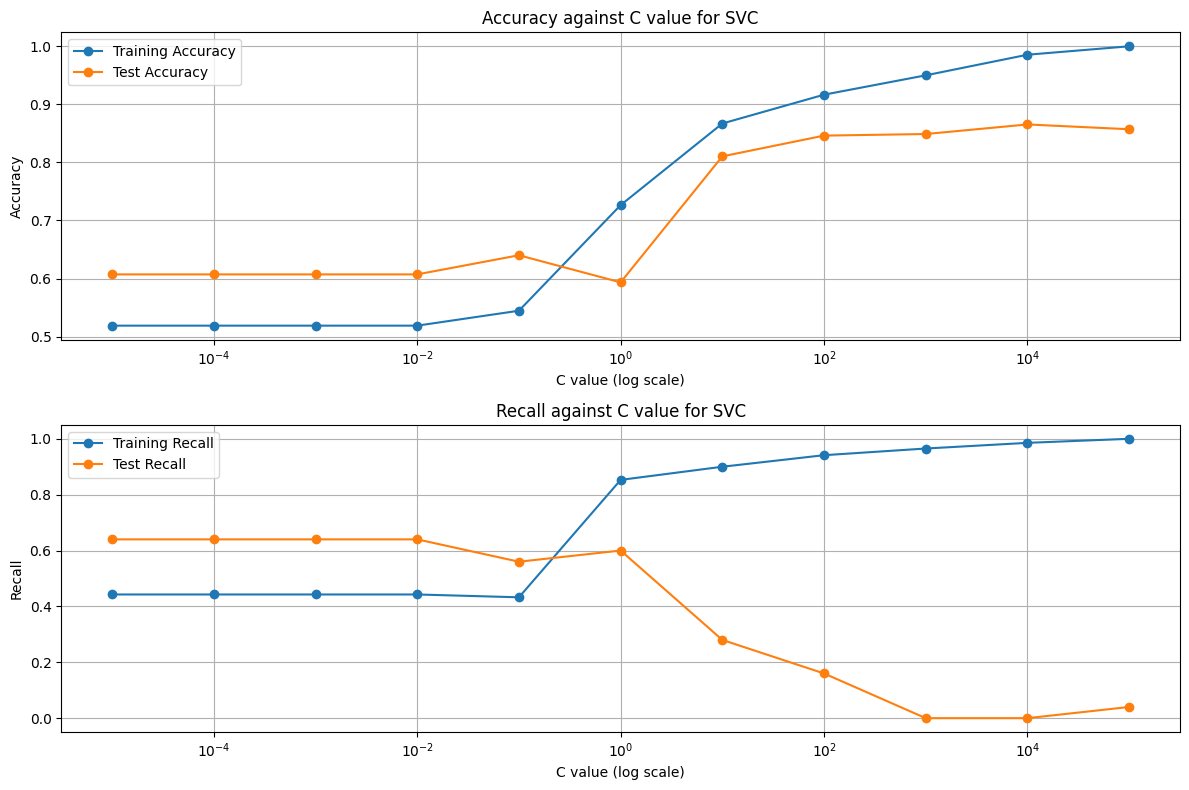

In [ ]:
plt.figure(figsize=(12, 8))

# accuracy
plt.subplot(2, 1, 1)
plt.plot(C_values, accuracy_train, label='Training Accuracy', marker='o')
plt.plot(C_values, accuracy_test, label='Test Accuracy', marker='o')
plt.xscale('log')
plt.xlabel('C value (log scale)')
plt.ylabel('Accuracy')
plt.title('Accuracy against C value for SVC')
plt.legend()
plt.grid(True)

# recall
plt.subplot(2, 1, 2)
plt.plot(C_values, recall_train, label='Training Recall', marker='o')
plt.plot(C_values, recall_test, label='Test Recall', marker='o')
plt.xscale('log')
plt.xlabel('C value (log scale)')
plt.ylabel('Recall')
plt.title('Recall against C value for SVC')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In brief:

As we can see over here, there are areas whereby the test set outperformed the training set in terms of accuracy and recall. This could possibly be due to the smote technique creating noise and hence the test set is cleaner than the training set. Also, as C increases, we can see that our recall metric starts to drop while training recall increases to 1.0 at high C value beyond 10^4 representing overfitting. This helps to explain why the model did better (back in the phase whereby we were just training the model on the default option) compared to that using grid search CV.

To conclude:

Interestingly, despite not achieving high recall and accuracy on the test data due to various factors—including a significantly imbalanced dataset—the absence of the bronchodilator response metric, commonly used in clinical settings, also impacted the results. This analysis, though not comprehensive enough to definitively conclude that the traits examined cannot predict asthma, underscores the challenges of preparing such datasets for analysis. Additionally, it aligns with clinical evidence that diagnosing asthma without considering the bronchodilator response is incomplete. This assignment highlights the importance of having field knowledge for data cleaning and completeness and the selection of relevant metrics in improving the accuracy and applicability of predictive models in healthcare."